# 昨天讲了线性回归，今天接着来讲讲它的兄弟---多元回归与非线性回归

**多元回归**：自变量有不止一个，最后来预测一个结果

**非线性回归**：函数就不是简单的都是一次项，引入了高阶项使函数更能完美拟合得到准确率更高的预测值

# 首先引入一个学生的身高体重数据集来回顾昨天的一元线性回归

*训练集*

|序号|身高(m)|体重(kg)|
|-----|-------|-----|
|1|0.86|12|
|2|0.96|15|
|3|1.12|20|
|4|1.35|35|
|5|1.55|48|
|6|1.63|51|
|7|1.71|59|
|8|1.78|66|

*测试集*

|序号|身高(m)|体重(kg)|
|-----|------|------|
|1|0.75|10|
|2|1.08|17|
|3|1.26|27|
|4|1.51|41|
|5|1.6|50|
|6|1.67|64|
|7|1.85|75|

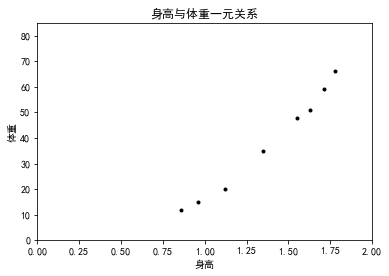

In [6]:
#先查看身高体重是否存在线性关系
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import PolynomialFeatures
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


def runplt():
    plt.figure()
    plt.title('身高与体重一元关系')
    plt.xlabel('身高')
    plt.ylabel('体重')
    plt.axis([0,2,0,85])
    plt.grid
    return plt

X=[[0.86],[0.96],[1.12],[1.35],[1.55],[1.63],[1.71],[1.78]]
y=[[12],[15],[20],[35],[48],[51],[59],[66]]

plt=runplt()
plt.plot(X,y,'k.')
plt.show()

In [3]:
# 用sklearn的线性模型去拟合
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

#使用身高1.67来进行模型预测
print('预测身高为1.67米的体重为:',model.predict(np.array([1.67]).reshape(-1,1)))

预测身高为1.67米的体重为: [[55.75685871]]


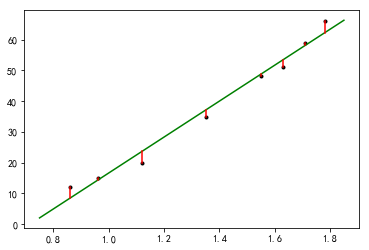

In [4]:
#用测试集对模型整体预测
X_test=[[0.75],[1.08],[1.26],[1.51],[1.6],[1.85]]
y_predict=model.predict(X_test)

plt.plot(X,y,'k.')
plt.plot(X_test,y_predict,'g-')

#残差
yr=model.predict(X)
for idx,x in enumerate(X):
    plt.plot([x,x],[y[idx],yr[idx]],'r-')
plt.show()

In [5]:
#对模型评估
y_test=[[10],[17],[27],[41],[50],[75]]
r2=model.score(X_test,y_test)
print("模型的确定系数为:",r2)

模型的确定系数为: 0.9252812815771203


# 进行二元回归分析

# 使用身高，年龄，体重数据集

*训练集*

|序号|身高(cm)|年龄(岁)|体重(kg)
|-----|------|------|------|
|1|147|9|34|
|2|129|7|23|
|3|141|9|25|
|4|145|11|47|
|5|142|11|26|
|6|151|13|46|

*测试集*

|序号|身高(cm)|年龄(岁)|体重(kg)
|-----|------|------|------|
|1|149|11|41|
|2|152|12|37|
|3|140|8|28|
|4|138|10|27|
|5|132|7|21|
|6|147|10|38|

In [6]:
x_train=[[147,9],[129,7],[141,9],[145,11],[142,11],[151,13]]
y_train=[[34],[23],[25],[47],[26],[46]]
model2=LinearRegression()
model2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
x_test=[[149,11],[152,12],[140,8],[138,10],[132,7],[147,10]]
Y_test=[[41],[37],[28],[27],[21],[38]]

predictions=model2.predict(x_test)

print("模型2的确定系数为:",model2.score(x_test,Y_test))
for i,prediction in enumerate(predictions):
    print("预测值:{},真实值为{}".format(prediction,Y_test[i]))

模型2的确定系数为: 0.8070941958378428
预测值:[39.41550696],真实值为[41]
预测值:[43.21570577],真实值为[37]
预测值:[28.01491054],真实值为[28]
预测值:[30.78031809],真实值为[27]
预测值:[21.19284294],真实值为[21]
预测值:[36.21968191],真实值为[38]


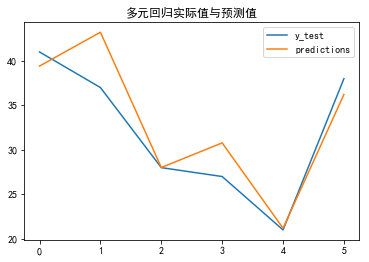

In [8]:
plt.title('多元回归实际值与预测值')
plt.plot(Y_test,label='y_test')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

# 对第一个数据集增加二次项实现非线性回归

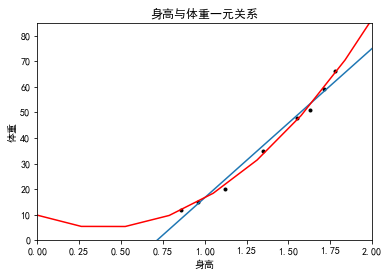

一元线性回归r^2:0.93
二元线性回归r^2:0.99


In [9]:
x1_train=[[0.86],[0.96],[1.12],[1.35],[1.55],[1.63],[1.71],[1.78]]
y1_train=[[12],[15],[20],[35],[48],[51],[59],[66]]

x1_test=[[0.75],[1.08],[1.26],[1.51],[1.6],[1.85]]
y1_test=[[10],[17],[27],[41],[50],[75]]

#显示
plt = runplt()
regressor = LinearRegression()
regressor.fit(x1_train,y1_train)
xx = np.linspace(0,26,100)
yy = regressor.predict(xx.reshape(xx.shape[0],1))
plt.plot(x1_train,y1_train,'k.')
plt.plot(xx,yy)

#构建回归函数,添加二次项
quadratic_fearurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_fearurizer.fit_transform(x1_train)
X_test_quadratic = quadratic_fearurizer.transform(x1_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic,y1_train)
xx_quadratic = quadratic_fearurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_quadratic.predict(xx_quadratic),'r-')
plt.show()
print('一元线性回归r^2:%.2f'%regressor.score(x1_test,y1_test))
print('二元线性回归r^2:%.2f'%regressor_quadratic.score(X_test_quadratic,y1_test))

# 可以看出引入二次项函数拟合的更好，确定系数也增大了

**下面我们做个测试，看看引入更高阶的项看能不能效果更好**

1项式r^2是0.93
2项式r^2是0.99
3项式r^2是0.99
4项式r^2是0.98
5项式r^2是0.97
6项式r^2是0.93
7项式r^2是-3.03
8项式r^2是-0.80


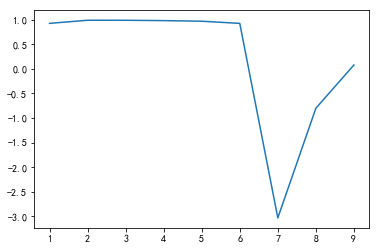

In [10]:
k_range = range(2,10)
k_scores = []


regressor = LinearRegression()
regressor.fit(x1_train,y1_train)
k_scores.append(regressor.score(x1_test,y1_test))

for k in k_range:
    k_featurizer = PolynomialFeatures(degree=k)
    x1_train_k = k_featurizer.fit_transform(x1_train)
    x1_test_k = k_featurizer.transform(x1_test)
    regressor_k = LinearRegression()
    regressor_k.fit(x1_train_k,y1_train)
    k_scores.append(regressor_k.score(x1_test_k,y1_test))

for i in range(0,8):
    print('%d项式$r^2$是%.2f'%(i+1,k_scores[i]))

plt.plot([1,2,3,4,5,6,7,8,9],k_scores)
plt.show()

# 可以看到并不是越高阶拟合的越准确，因为有可能在训练集上拟合的过于好，导致过拟合最后在测试集上就出现了很差的表现

In [1]:
# 再来个多元回归的例子

#1.广告和销量的多元分析
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#导入数据
data=pd.read_csv('./Advertising.csv')

#查看数据
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# 这是一个广告和产品销量的数据集，TV,radio,newspaper分别代表电视，收音机，报纸三种广告消费，sales代表产品销售量

In [2]:
# 切分训练集和测试集
X=data[['TV','radio','newspaper']]
y=data['sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)#训练集测试集6，4分

linreg=LinearRegression()
model=linreg.fit(X_train,y_train)

print("参数为:",model.intercept_)
print("系数为:",model.coef_)

参数为: 3.075382816705222
系数为: [0.04475753 0.18434893 0.00279513]


In [3]:
#预测
y_pred=model.predict(X_test)
print("预测值为:",y_pred)

预测值为: [21.75935389 16.33809031  7.63745109 17.53818323 18.44533055 23.69631164
 16.35757645 13.32174877  9.29888886 17.22778955 14.42337872 10.00290799
 17.12037969 16.94530844 14.85121973 15.72525459 12.45868165 16.86598652
 11.43677858 17.97008288  9.34885119 13.17575947  9.05759361 10.49369368
 11.44407166 14.91597281 10.02465801 19.27092122 18.29365658 16.96430184
 21.51490518 14.43483768 16.35517797 12.22942505 19.81723254 15.28387086
 13.69286047 10.00528399 20.94776128  7.70556117  3.80700147  7.24161546
  6.20837682 18.40405093  8.69803622 14.12749368 15.29938376 20.31949892
 20.61959811 19.50910564 23.98271026 14.99816755  6.95559327 19.92910294
 18.65080035 12.3799137  13.92697437  6.30517479 15.07332437  9.83189417
 12.01337633 12.01167681  8.85538071 21.32769068 23.12633826 12.68907096
  6.69065209 17.9661496  16.29648425  9.026378   20.18687816 20.65259527
 24.07534345 10.52786144 10.86843723 16.28405732 10.79545876  6.68370536
 21.23587157 14.4693085 ]


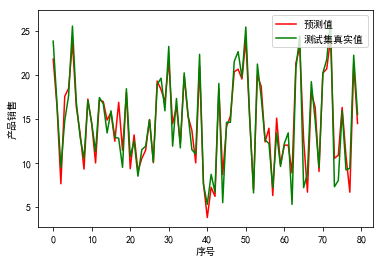

In [7]:
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'r',label='预测值')
plt.plot(range(len(y_pred)),y_test,'g',label='测试集真实值')
plt.legend(loc="upper right")
plt.xlabel('序号')
plt.ylabel('产品销售')
plt.show()

In [8]:
#计算拟合的均方误差，评估模型
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_err=np.sqrt(sum_mean/len(y_pred))
print("模型的均方根误差为",sum_err)

模型的均方根误差为 1.5635772207961516
